In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [52]:
traindf = pd.read_csv('train.csv')

In [53]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
numeric_df = traindf.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [55]:
req_tr = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [56]:
selected_tr = traindf[req_tr]

In [57]:
selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
                                    selected_tr['BsmtHalfBath'].fillna(0) +
                                    selected_tr['FullBath'].fillna(0) +
                                    selected_tr['HalfBath'].fillna(0))

selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +
                                  selected_tr['1stFlrSF'].fillna(0) +
                                  selected_tr['2ndFlrSF'].fillna(0) +
                                  selected_tr['LowQualFinSF'].fillna(0) +
                                  selected_tr['GrLivArea'].fillna(0))

/tmp/ipython-input-57-341052813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
/tmp/ipython-input-57-341052813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +


In [58]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,5688
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3234


In [59]:
train_df = selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]

In [60]:
train_df

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,8,4,548,4276,7,208500
1,6,3,460,3786,6,181500
2,6,4,608,4492,7,223500
3,7,2,642,4190,7,140000
4,9,4,836,5541,8,250000
...,...,...,...,...,...,...
1455,7,3,460,4247,6,175000
1456,7,3,500,5688,6,210000
1457,9,2,252,5832,7,266500
1458,5,2,240,3234,5,142125


In [61]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(train_df,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 1168
Rows in test set:292



In [62]:
housing = train_set.drop("SalePrice",axis=1)
housing_labels = train_set["SalePrice"].copy()

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [64]:
X_train = my_pipeline.fit_transform(housing)

In [65]:
X_train

array([[-0.96456591, -0.48377079, -0.86383727, -0.13352109, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.13428593, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.32207838, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -1.16605156, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.26966215,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.28025593,  0.64257719]])

In [66]:
Y_train = housing_labels

In [67]:
Y_train.shape

(1168,)

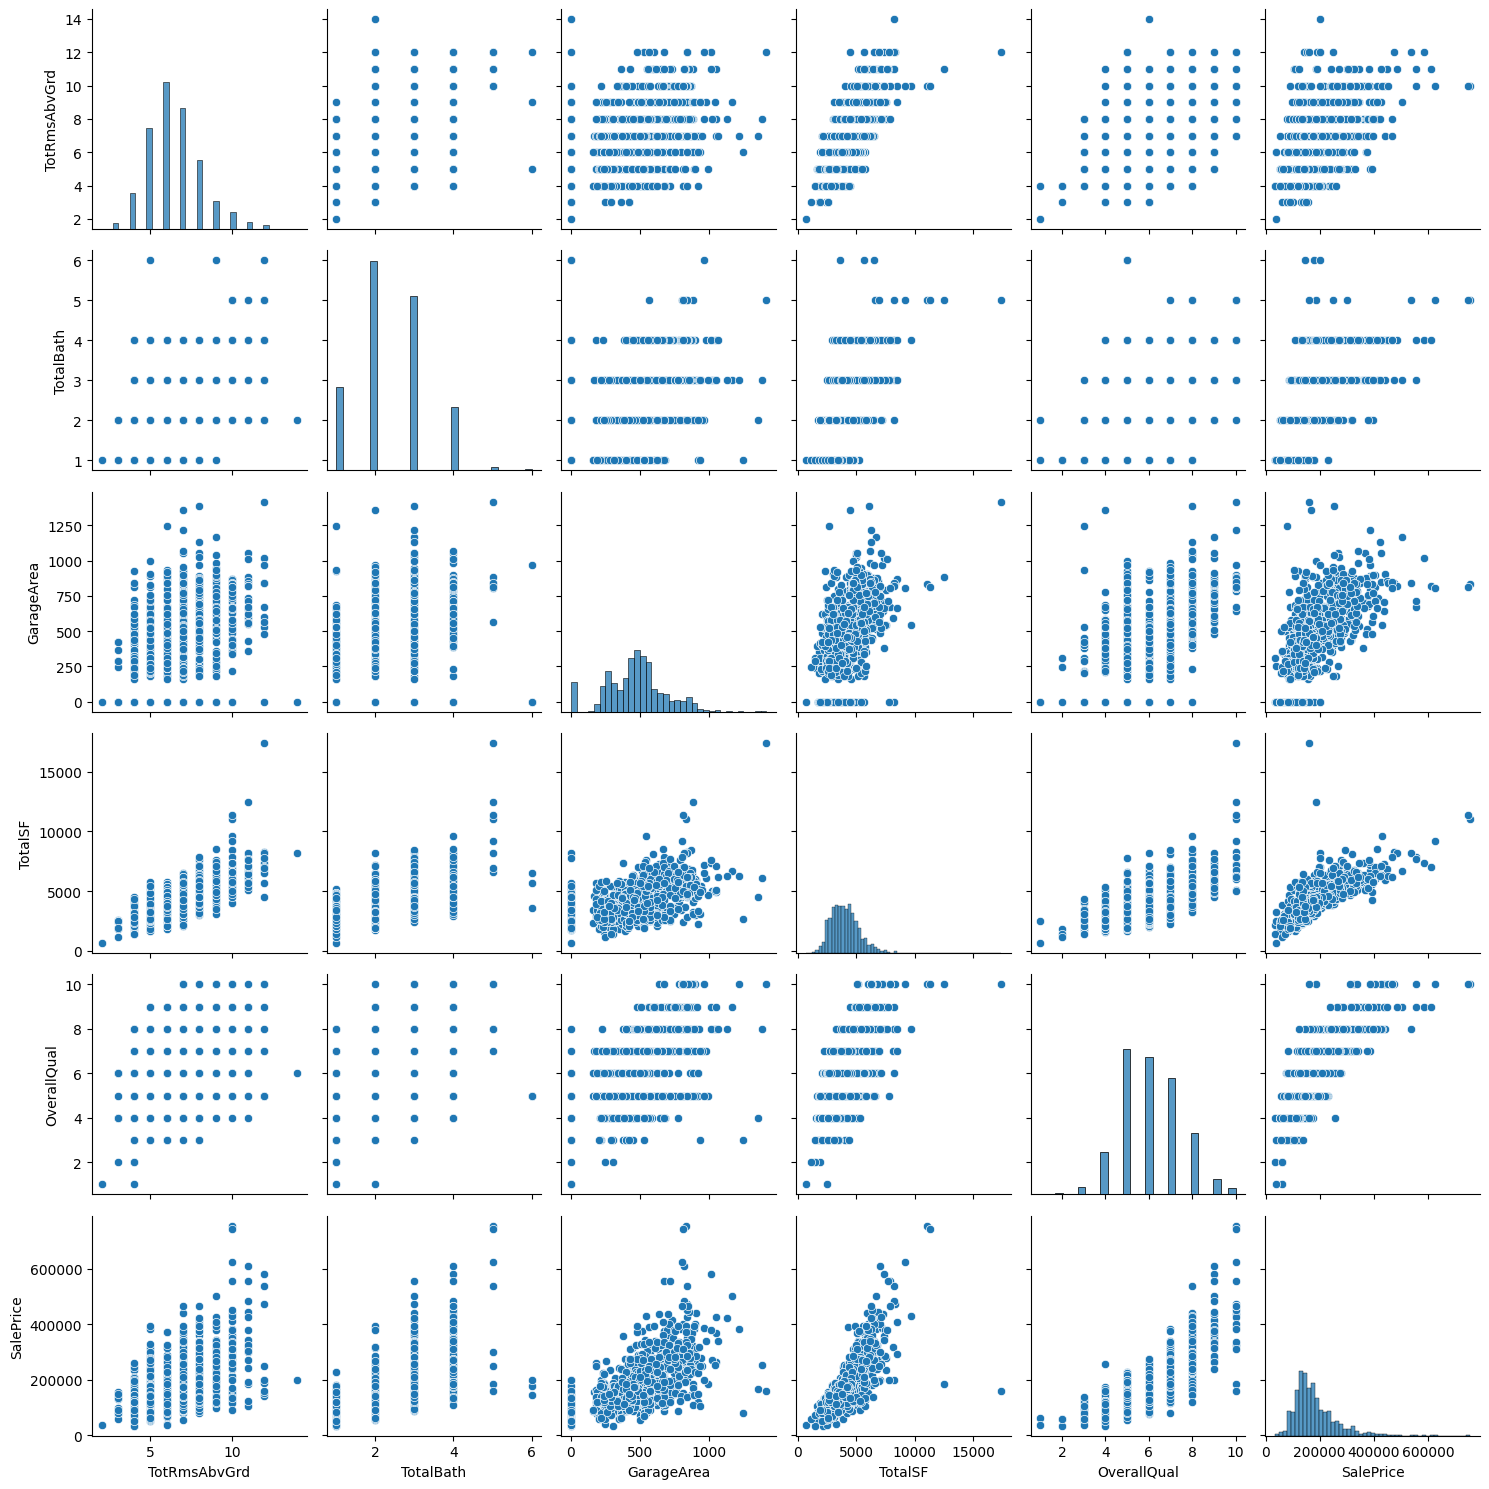

In [68]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [69]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
TotalSF,0.773909
GarageArea,0.623431
TotalBath,0.613005
TotRmsAbvGrd,0.533723


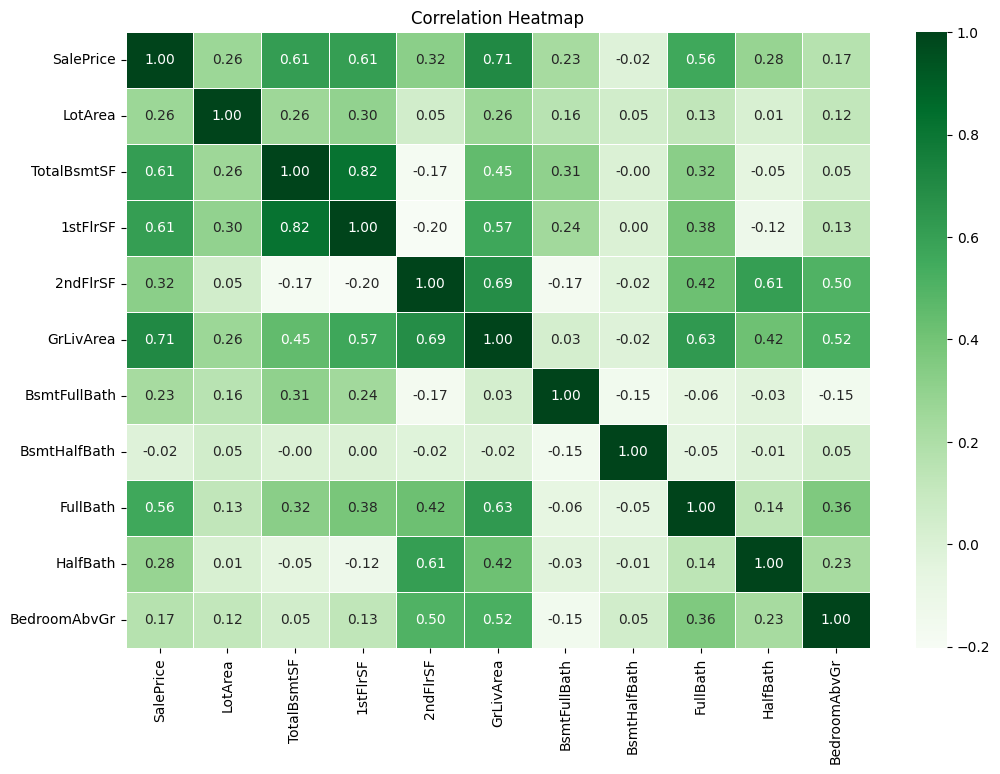

In [100]:
col=['SalePrice','LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
# Calculate the correlation matrix
correlation_matrix = traindf[col].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [71]:
testdf = pd.read_csv("test.csv")

In [72]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
req_tst = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [74]:
selected_tst = testdf[req_tst]

In [75]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
                                    selected_tst['BsmtHalfBath'].fillna(0) +
                                    selected_tst['FullBath'].fillna(0) +
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +
                                  selected_tst['1stFlrSF'].fillna(0) +
                                  selected_tst['2ndFlrSF'].fillna(0) +
                                  selected_tst['LowQualFinSF'].fillna(0) +
                                  selected_tst['GrLivArea'].fillna(0))

/tmp/ipython-input-75-771691818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
/tmp/ipython-input-75-771691818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [76]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,2.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,3.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,3.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,2.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,2.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2.0,2852.0


In [77]:
test_df_unproc = selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]

In [78]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [79]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [80]:
x_test = my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)

In [81]:
x_test

array([[-0.96456591, -1.57881784,  1.2024646 , -1.10333489, -0.82044456],
       [-0.34690528, -0.48377079, -0.77853123, -0.09910341, -0.08893368],
       [-0.34690528,  0.61127627,  0.02713693,  0.05309923, -0.82044456],
       ...,
       [ 0.27075534, -0.48377079,  0.47262403, -0.34002719, -0.82044456],
       [-0.34690528, -0.48377079, -2.25716927, -0.96719384, -0.82044456],
       [ 1.50607659,  0.61127627,  0.82332664,  0.67261751,  0.64257719]])

In [82]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [83]:
y_train_pred = model.predict(X_train)

In [84]:
y_train_pred[:5]

array([147477.  , 173298.32,  90253.  , 167967.74, 139890.5 ])

In [85]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [86]:
proc_data = my_pipeline.transform(some_data)

In [87]:
model.predict(proc_data)

array([147477.  , 173298.32,  90253.  , 167967.74, 139890.5 ])

In [88]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [89]:
train_mse = mean_squared_error(Y_train,y_train_pred)

In [90]:
train_rmse = np.sqrt(train_mse)

In [91]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 195357719.57, Training RMSE: 13977.04


In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv = 200)
rmse_scores = np.sqrt(-scores)

In [93]:
rmse_scores

array([ 21910.65070067,  14595.49274973,  26290.78708298,  12067.02983812,
        49128.13526611,  11728.71500331,  19204.97531239,  12667.84744285,
         9685.08552652,  48087.53042315,  37293.16281298,  29992.8821493 ,
        13657.22224052,   9291.76847578,  19875.28001191,  22240.13756281,
        18590.92577956,  35680.26533955,  38248.54913757,  23295.53741395,
        28132.02930937,  18962.28881714,  18375.1383484 ,  27665.80757013,
        17686.50582536,  18125.33194532,  43143.35144665,  36497.04943235,
       164578.13876972,  49095.98778768,  24500.70286211,  31901.03809654,
        21698.78366196,  31023.15403538,  48158.27961006,  10632.45181888,
        24005.86383343,  29788.10768658,  17747.27617469,  28439.3529803 ,
        22439.58298222,  31919.10192388,  28096.47611478,  32971.6964495 ,
        35127.32460604,  27592.33362014,  29384.52571177,  44537.14800344,
        21152.66110325,  19802.76645767,  20435.72003523,  51097.87922147,
        46582.85508006,  

In [94]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [95]:
print_scores(rmse_scores)

Scores: [ 21910.65070067  14595.49274973  26290.78708298  12067.02983812
  49128.13526611  11728.71500331  19204.97531239  12667.84744285
   9685.08552652  48087.53042315  37293.16281298  29992.8821493
  13657.22224052   9291.76847578  19875.28001191  22240.13756281
  18590.92577956  35680.26533955  38248.54913757  23295.53741395
  28132.02930937  18962.28881714  18375.1383484   27665.80757013
  17686.50582536  18125.33194532  43143.35144665  36497.04943235
 164578.13876972  49095.98778768  24500.70286211  31901.03809654
  21698.78366196  31023.15403538  48158.27961006  10632.45181888
  24005.86383343  29788.10768658  17747.27617469  28439.3529803
  22439.58298222  31919.10192388  28096.47611478  32971.6964495
  35127.32460604  27592.33362014  29384.52571177  44537.14800344
  21152.66110325  19802.76645767  20435.72003523  51097.87922147
  46582.85508006  35804.29088434  21849.24086164  27043.12857624
   9839.76253666  26936.31187024  30179.62637243  31438.39145649
 187147.9259985   13

In [96]:
y_pred=model.predict(x_test)

In [97]:
y_pred

array([129002.32, 155986.32, 147181.  , ..., 141620.5 , 108698.  ,
       238397.11])

In [98]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)